# Explore surface CREG025.L75 experiment to assess the AW subduction process over the FraWSC box

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import CREG_maps_func as cregmap
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from netCDF4 import Dataset

%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


ImportError: No module named numba

In [14]:
s_year=1980 ; e_year=2015

RYEAR=str(s_year)+'-'+str(e_year)

In [15]:
CONFIG='CREG025.L75'   ; CASE=''
CONFCASE=CONFIG

In [16]:
# List of experiments names:
case_Ref='BCTGE27NTMX'   #; case_Ref='BVHNTMXP'  ;  case_Ref='BVHNTMXD' 

##### Read CREG025.L75 grid information 

In [17]:
main_dir='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'
grid_dir=main_dir+CONFIG+'/GRID/'

# Mask of the grid
ds_mask=xr.open_dataset(grid_dir+CONFCASE+'_byte_mask.nc')
ds_mask

# Horizontal mesh
ds_mesh_hgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_hgr.nc')
ds_mesh_hgr

# Vertical mesh
ds_mesh_zgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_zgr.nc')
ds_mesh_zgr

# Bathymetry
ds_bathy=xr.open_dataset(grid_dir+'CREG025_bathy_etopo1_gebco1_smoothed_coast_corrected_bering_may11_time_vh20161220.nc')
ds_bathy

fieldbat=Dataset(grid_dir+'CREG025_bathy_etopo1_gebco1_smoothed_coast_corrected_bering_may11_time_vh20161220.nc')
lon=np.squeeze(fieldbat.variables['nav_lon'])
lat=np.squeeze(fieldbat.variables['nav_lat'])
#ds_bathy['Bathymetry']= xr.where(ds_bathy['Bathymetry'] <= 0.,ds_bathy['Bathymetry'])

In [18]:
ds_grid=xr.Dataset()
ds_grid
#ds_grid['tmask2D']=(('time','z','y','x'),ds_mask['tmask'])
ds_grid['Tarea']=ds_mask['tmask'][0,0,:,:]*ds_mesh_hgr['e1t'][0,:,:]*ds_mesh_hgr['e2t'][0,:,:]
ds_grid['Farea']=ds_mask['fmask'][0,0,:,:]*ds_mesh_hgr['e1f'][0,:,:]*ds_mesh_hgr['e2f'][0,:,:]
ds_grid['tmask2D']=ds_mask['tmask'].sel(z=0).squeeze()
ds_grid.coords['gphif']=(('y','x'),ds_mesh_hgr['gphif'][0,:,:])
ds_grid.coords['glamf']=(('y','x'),ds_mesh_hgr['glamf'][0,:,:])
ds_grid.coords['gphit']=(('y','x'),ds_mesh_hgr['gphit'][0,:,:])
ds_grid.coords['glamt']=(('y','x'),ds_mesh_hgr['glamt'][0,:,:])
ds_grid['Bathymetry']=(('y','x'),ds_bathy['Bathymetry'])
ds_grid['lon']=(('y','x'),ds_bathy['nav_lon'])
ds_grid['lat']=(('y','x'),ds_bathy['nav_lat'])

ds_grid

#plt.imshow(ds_grid['Farea'],origin='bottom')

<xarray.Dataset>
Dimensions:     (x: 528, y: 603)
Coordinates:
    gphif       (y, x) float32 25.4716 25.471653 ... 55.095528 55.02518
    glamf       (y, x) float32 -93.62534 -93.37534 ... 102.25591 102.051285
    gphit       (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175
    glamt       (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
Dimensions without coordinates: x, y
Data variables:
    Tarea       (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Farea       (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmask2D     (y, x) int8 ...
    Bathymetry  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon         (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
    lat         (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175

#### Define the WSC box limited to the Fram strait at its northern edge and a box north to Svalbard

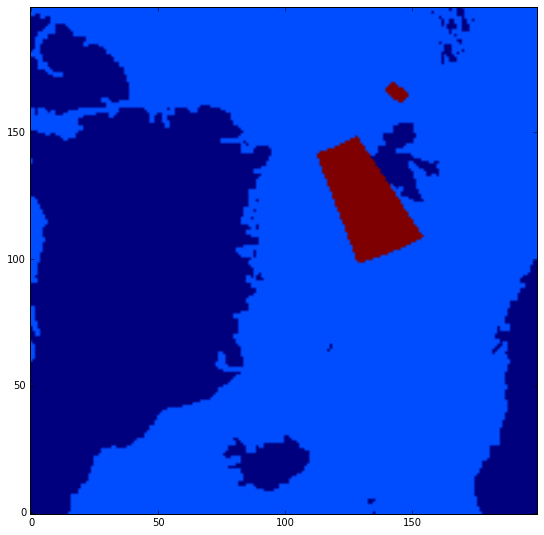

In [19]:
# Identify the area with boolean 
FraWSC_msk=(ds_grid.coords['gphit']>75.)&(ds_grid.coords['gphit']<81.)& \
        (ds_grid.coords['glamt']>0.) & (ds_grid.coords['glamt']<13.)

# Then define a mask with either 0 or 1 values
ds_grid['FraWSC_msk']=xr.where(FraWSC_msk,1.,0.)


# Exactly the same as above but create a DataArray instead 
# used to reduce the area corresponding to the box
aze=xr.where(FraWSC_msk,1.,0.)
FraWSC_mskReduce=aze.where(ds_grid['FraWSC_msk']==1,drop=True)

StJose_msk=(ds_grid.coords['gphit']>81.)&(ds_grid.coords['gphit']<82)& \
        (ds_grid.coords['glamt']>29.) & (ds_grid.coords['glamt']<33.)

# Then define a mask with either 0 or 1 values
ds_grid['StJose_msk']=xr.where(StJose_msk,1.,0.)

# Control the location of the mask
plt.figure(figsize=(20,10))
#plt.subplot(121)
#plt.imshow(NorSeas_msk,origin='botom')
plt.subplot(122)
ds_grid['FraWSC_loc']=xr.where(FraWSC_msk,5.,ds_grid['tmask2D'][:,:])
plt.imshow(ds_grid['FraWSC_loc'][200:400,200:400],origin='botom')
ds_grid['StJose_loc']=xr.where(StJose_msk,5.,ds_grid['FraWSC_loc'])
plt.imshow(ds_grid['StJose_loc'][200:400,200:400],origin='botom')



>>> 

In [20]:
!date

Thu Jan 24 13:34:10 UTC 2019


# Surface net Heat fluxes & AW max T°  

In [21]:
# Ref experiment data
DATA_PATH='/home/ctalandi/TOOLS/SSHFS/drakkarcom/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'-MEAN/1m/'+RYEAR+'/'
ds_RefQ=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_flxT.nc',autoclose=True)
monthly_time=pd.date_range(start=str(s_year)+'-01-01',end=str(e_year)+'-12-31',freq='M')


In [22]:
# Ref experiment data
DATA_PATH='/home/ctalandi/TOOLS/SSHFS/drakkarcom/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'-MEAN/1m/'+RYEAR+'/'
ds_RefIce=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_icemod.nc',autoclose=True)

In [23]:
# Ref experiment data
DATA_PATH='/home/ctalandi/TOOLS/SSHFS/drakkarcom/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'-MEAN/1m/'+RYEAR+'/'
ds_RefgT=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_gridT.nc',autoclose=True)
ds_RefgT

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 432, x: 528, y: 603)
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    votemper      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    vosaline      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    ssh           (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldkz5        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldr10_1  

In [52]:
ds_RefgT.nbytes/1e9

127.088708268

In [24]:
!date

Thu Jan 24 13:36:22 UTC 2019


### Compute the AW max T

In [25]:
def AWTmax_maps(ds,ds_grid) :

        dsout=xr.Dataset()
        # Start to mask field where Salinity is lower than 33.5 PSU
        # Necessary to remove the surface temperature maxima than can arise
        dsout['temp']=xr.where((ds['vosaline'] <= 33.5),0., ds['votemper'])

        # Find the Max temp. over depth
        dsout['AWTmax']=dsout['temp'].max(dim='deptht')*ds_grid['tmask2D'][:,:]

        # Find the Max temp. depth level 
        #dsout['AWTmax_depth_level']=dsout['temp'].argmax(dim='deptht')

        return dsout

In [26]:
ds_diags=AWTmax_maps(ds_RefgT,ds_grid)

In [27]:
ds_diags

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 432, x: 528, y: 603)
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
    gphif         (y, x) float32 25.4716 25.471653 ... 55.095528 55.02518
    glamf         (y, x) float32 -93.62534 -93.37534 ... 102.25591 102.051285
    gphit         (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175
    glamt         (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
Dimensions without coordinates: x, y
Data variables:
    temp          (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    AWTmax        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>

In [28]:
# Plot the Qnet and contrast 2 periods JFM with JAS
# For that:
#       - groupby month and perform a mean over all months
#       - select months to gather to build JFM and JAS seasons
ds_RefQ_seas=ds_RefQ.hfxout.groupby('time_counter.month').mean('time_counter')
ds_RefQ_seas_JFM=ds_RefQ_seas.sel(month=slice(0,3)).mean(dim='month')
ds_RefQ_seas_JAS=ds_RefQ_seas.sel(month=slice(6,9)).mean(dim='month')

ds_RefIce_seas=ds_RefIce.siconc.groupby('time_counter.month').mean('time_counter')
ds_RefIce_seas_JFM=ds_RefIce_seas.sel(month=slice(0,3)).mean(dim='month')
ds_RefIce_seas_JAS=ds_RefIce_seas.sel(month=slice(6,9)).mean(dim='month')

ds_AWT_seas=ds_diags.AWTmax.groupby('time_counter.month').mean('time_counter')
ds_AWT_seas_JFM=ds_AWT_seas.sel(month=slice(0,3)).mean(dim='month')
ds_AWT_seas_JAS=ds_AWT_seas.sel(month=slice(6,9)).mean(dim='month')

In [29]:
!date

Thu Jan 24 13:36:23 UTC 2019


# Compute diagnostics for the regression

In [30]:
ds_diags['are_FraWSC']=ds_grid['Tarea']*ds_grid['FraWSC_msk']
ds_diags['are_StJose']=ds_grid['Tarea']*ds_grid['StJose_msk']


In [31]:
# Compute the mean AWTmax Time series in the Saint Joseph box
ds_diags['Ref_AWTmax_StJose']=ds_diags['AWTmax']*ds_diags['are_StJose']
ds_diags['Ref_AWTmax_StJose_meanTiSe']=ds_diags['Ref_AWTmax_StJose'].sum(dim=('y','x'))/ds_diags['are_StJose'].sum(dim=('y','x'))

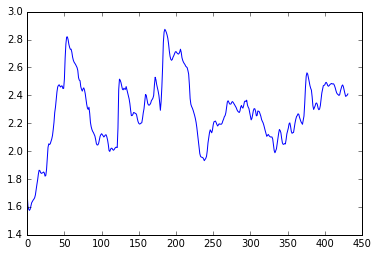

In [32]:
plt.plot(ds_diags['Ref_AWTmax_StJose_meanTiSe'])

In [33]:
ds_diagsRedXY=xr.Dataset()


In [34]:
# Reduce the area to analyse to the selected box
ds_diagsRedXY['ds_RefQ_FraWSC']=ds_RefQ.hfxout.where(ds_grid['FraWSC_msk']==1, drop=True)
#ds_diagsRedXY['ds_RefIce_FraWSC']=ds_RefIce..where(ds_grid['FraWSC_msk']==1, drop=True)

In [35]:
ds_diagsRedXY

<xarray.Dataset>
Dimensions:         (time_counter: 432, x: 42, y: 50)
Coordinates:
  * time_counter    (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
    gphif           (y, x) float32 75.68229 75.65535 ... 79.25093 79.17163
    glamf           (y, x) float32 -6.687092 -6.219887 ... 26.490406 26.932688
    gphit           (y, x) float32 75.63034 75.6039 ... 79.24471 79.16602
    glamt           (y, x) float32 -6.980464 -6.5142307 ... 26.03641 26.481747
Dimensions without coordinates: x, y
Data variables:
    ds_RefQ_FraWSC  (time_counter, y, x) float32 dask.array<shape=(432, 50, 42), chunksize=(1, 50, 42)>

/usr/lib/python2.7/dist-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


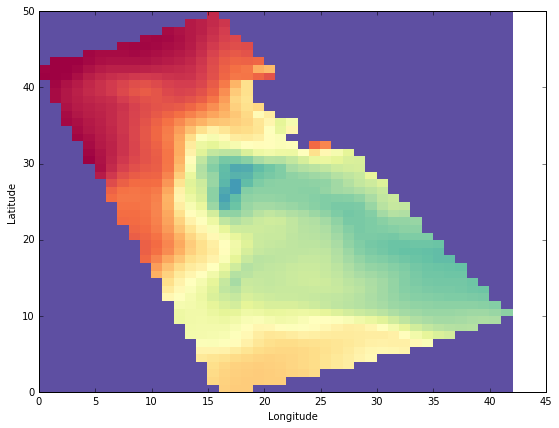

In [36]:
plt.figure(figsize=(20,15))
plt.subplot(221)   
C=plt.pcolormesh(ds_diagsRedXY['ds_RefQ_FraWSC'][0,:,:], vmin=-500.,vmax=0., \
                cmap=plt.cm.get_cmap('Spectral_r'))
plt.ylabel('Latitude') ;  plt.xlabel('Longitude')

In [37]:
#plt.plot(ds_diagsRedXY['ds_RefQ_FraWSC'][:,20,15])

>>> # Reshape dataSet to compute correlation

In [38]:
ds_diagsRedXY

<xarray.Dataset>
Dimensions:         (time_counter: 432, x: 42, y: 50)
Coordinates:
  * time_counter    (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
    gphif           (y, x) float32 75.68229 75.65535 ... 79.25093 79.17163
    glamf           (y, x) float32 -6.687092 -6.219887 ... 26.490406 26.932688
    gphit           (y, x) float32 75.63034 75.6039 ... 79.24471 79.16602
    glamt           (y, x) float32 -6.980464 -6.5142307 ... 26.03641 26.481747
Dimensions without coordinates: x, y
Data variables:
    ds_RefQ_FraWSC  (time_counter, y, x) float32 dask.array<shape=(432, 50, 42), chunksize=(1, 50, 42)>

In [39]:
ar_init=np.zeros((ds_diagsRedXY.dims['y'],ds_diagsRedXY.dims['x']))
ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Cor']=(('y','x'),ar_init)
ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Con']=(('y','x'),ar_init)

In [40]:
ds_diagsRedXY

<xarray.Dataset>
Dimensions:                 (time_counter: 432, x: 42, y: 50)
Coordinates:
  * time_counter            (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
    gphif                   (y, x) float32 75.68229 75.65535 ... 79.17163
    glamf                   (y, x) float32 -6.687092 -6.219887 ... 26.932688
    gphit                   (y, x) float32 75.63034 75.6039 ... 79.16602
    glamt                   (y, x) float32 -6.980464 -6.5142307 ... 26.481747
Dimensions without coordinates: x, y
Data variables:
    ds_RefQ_FraWSC          (time_counter, y, x) float32 dask.array<shape=(432, 50, 42), chunksize=(1, 50, 42)>
    ds_RefQ-AWT_FraWSC_Cor  (y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ds_RefQ-AWT_FraWSC_Con  (y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

>>> # Compute the stats

In [123]:
import scipy
import scipy.stats

>> ### In a faster way using Dask capabilities

In [43]:
from dask.distributed import Client, LocalCluster


lc = LocalCluster(n_workers=4)
client = Client(lc)
client

#test=ds_diagsRed.to_dask_dataframe(dim_order=('x','y'))
#test['ds_RefQ_seas_FraWSC']

Client Scheduler: tcp://127.0.0.1:46538,Cluster Workers: 4 Cores: 4 Memory: 65.89 GB


In [54]:
ds_diagsRedXY

<xarray.Dataset>
Dimensions:                 (time_counter: 432, x: 42, y: 50)
Coordinates:
  * time_counter            (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
    gphif                   (y, x) float32 75.68229 75.65535 ... 79.17163
    glamf                   (y, x) float32 -6.687092 -6.219887 ... 26.932688
    gphit                   (y, x) float32 75.63034 75.6039 ... 79.16602
    glamt                   (y, x) float32 -6.980464 -6.5142307 ... 26.481747
Dimensions without coordinates: x, y
Data variables:
    ds_RefQ_FraWSC          (time_counter, y, x) float32 dask.array<shape=(432, 50, 42), chunksize=(1, 50, 42)>
    ds_RefQ-AWT_FraWSC_Cor  (y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ds_RefQ-AWT_FraWSC_Con  (y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [55]:
ds_diagsRedXY.chunks={'time_counter':24,'y':50,'x':42}

AttributeError: can't set attribute

In [41]:
client.close()

>> ### In a classical iterative way point-point

In [125]:
!date

Wed Jan 16 20:03:40 UTC 2019


In [3]:
for y in set(np.arange(ds_diagsRedXY.dims['y'])) : 
    for x in set(np.arange(ds_diagsRedXY.dims['x'])):
        
        if not np.isnan(FraWSC_mskReduce.values[y,x]) :
            print 'Grid point y:'+str(y)+' - x:'+str(x)
            TempCorr=scipy.stats.pearsonr(ds_diagsRedXY['ds_RefQ_FraWSC'][:,y,x],\
                                          ds_diags['Ref_AWTmax_StJose_meanTiSe'])
            ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Cor'][y,x]=np.round(TempCorr[0],2)
            ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Con'][y,x]=np.round(TempCorr[1],4)
            print '        DHflx_QSurnet_CorSci Corr | p-val:', np.round(TempCorr[0],2),' | ', np.round(TempCorr[1],4)
        else:
            ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Cor'][y,x]=np.nan
            ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Con'][y,x]=np.nan


NameError: name 'np' is not defined

In [ ]:
!date

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(221)   
C=plt.pcolormesh(ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Cor'][:,:], vmin=0.,vmax=1., \
                cmap=plt.cm.get_cmap('Spectral_r'))
plt.ylabel('Latitude') ;  plt.xlabel('Longitude')
plt.subplot(222)   
C=plt.pcolormesh(ds_diagsRedXY['ds_RefQ-AWT_FraWSC_Con'][:,:], vmin=0.,vmax=1., \
                cmap=plt.cm.get_cmap('Spectral_r'))

In [ ]:
NCsave=False
if NCsave: 
    dsout=xr.Dataset()

    # Output Qnet climatology
    dsout['ds_RefQ_seas']=(('month','y','x'),ds_RefQ_seas)
    dsout.ds_RefQ_seas.attrs['units']='W.m-2'
    dsout.ds_RefQ_seas.attrs['long name']='Surface net heat flux climatology monthly mean over '+RYEAR

    dsout['ds_RefQ_seas_JFM']=(('y','x'),ds_RefQ_seas_JFM)
    dsout.ds_RefQ_seas_JFM.attrs['units']='W.m-2'
    dsout.ds_RefQ_seas_JFM.attrs['long name']='Surface net heat flux JFM seas. mean over '+RYEAR

    dsout['ds_RefQ_seas_JAS']=(('y','x'),ds_RefQ_seas_JAS)
    dsout.ds_RefQ_seas_JAS.attrs['units']='W.m-2'
    dsout.ds_RefQ_seas_JAS.attrs['long name']='Surface net heat flux JAS seas. mean over '+RYEAR

    # Output Ice fraction climatology
    dsout['ds_RefIce_seas']=(('month','y','x'),ds_RefIce_seas)
    dsout.ds_RefIce_seas.attrs['units']='-'
    dsout.ds_RefIce_seas.attrs['long name']='Sea-ice concentration climatology monthly mean over '+RYEAR

    dsout['ds_RefIce_seas_JFM']=(('y','x'),ds_RefIce_seas_JFM)
    dsout.ds_RefIce_seas_JFM.attrs['units']='-'
    dsout.ds_RefIce_seas_JFM.attrs['long name']='Sea-ice concentration JFM seas. mean over '+RYEAR

    dsout['ds_RefIce_seas_JAS']=(('y','x'),ds_RefIce_seas_JAS)
    dsout.ds_RefIce_seas_JAS.attrs['units']='-'
    dsout.ds_RefIce_seas_JAS.attrs['long name']='Sea-ice concentration JAS seas. mean over '+RYEAR

    # Output AWTmax climatology
    dsout['ds_AWT_seas']=(('month','y','x'),ds_AWT_seas)
    dsout.ds_AWT_seas.attrs['units']='-'
    dsout.ds_AWT_seas.attrs['long name']='Atlantic Water max. temperature climatology monthly mean over '+RYEAR

    dsout['ds_AWT_seas_JFM']=(('y','x'),ds_AWT_seas_JFM)
    dsout.ds_AWT_seas_JFM.attrs['units']='-'
    dsout.ds_AWT_seas_JFM.attrs['long name']='Atlantic Water max. temperature JFM seas. mean over '+RYEAR

    dsout['ds_AWT_seas_JAS']=(('y','x'),ds_AWT_seas_JAS)
    dsout.ds_AWT_seas_JAS.attrs['units']='-'
    dsout.ds_AWT_seas_JAS.attrs['long name']='Atlantic Water max. temperature JAS seas. mean over '+RYEAR
    

    dsout.to_netcdf('./NETCDF/'+case_Ref+'_y'+RYEAR+'_ClimSeas_Qt_AWTmax_IceConc.nc')

    NCsave=False

In [ ]:
!date

In [ ]:
plt.figure(figsize=(20,15))

# Surface heat fluxes
vmin=-400. ; vmax=200. ; vint=25.
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      
plt.subplot(221)
cregmap.WSC_plot(lon,lat,ds_RefQ_seas_JFM,ds_RefIce_seas_JFM,ds_grid,contours,limits, \
                 name=case_Ref+' Qnet \n JFM -'+RYEAR,zmy_cblab=r'(W m$^{-2}$)',zvar='Qnet')

plt.subplot(222)
cregmap.WSC_plot(lon,lat,ds_RefQ_seas_JAS,ds_RefIce_seas_JAS,ds_grid,contours,limits, \
                 name=case_Ref+' Qnet \n JAS -'+RYEAR,zmy_cblab=r'(W m$^{-2}$)',zvar='Qnet')


# AWTmax 
vmin=0. ; vmax=7. ; vint=0.5
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      
plt.subplot(223)
cregmap.WSC_plot(lon,lat,ds_AWT_seas_JFM,ds_RefIce_seas_JFM,ds_grid,contours,limits, \
                 name=case_Ref+' AWTmax \n JFM -'+RYEAR,zmy_cblab=r'($^{\circ}$C)',zvar='Temp')

plt.subplot(224)
cregmap.WSC_plot(lon,lat,ds_AWT_seas_JAS,ds_RefIce_seas_JAS,ds_grid,contours,limits, \
                 name=case_Ref+' AWTmax \n JAS -'+RYEAR,zmy_cblab=r'($^{\circ}$C)',zvar='Temp')

plt.tight_layout()

dosave=True
if dosave : plt.savefig(case_Ref+'_y'+RYEAR+'_Qnet-AWTmax_JFM-JOS.pdf',dpi=100)
dosave=False


In [ ]:
!date

In [ ]:
# Plot to check the shape of AWTmax 
plot_AWtmax=False
if plot_AWtmax:
    plt.figure(figsize=(20,15))
    plt.subplot(111)   
    C=plt.pcolormesh(ds_diagsAW['AWTmax'].mean(dim='time_counter')[200::,100:450] , vmin=0.,vmax=7., \
                     cmap=plt.cm.get_cmap('Spectral_r'))
    plt.ylabel('Latitude') ;  plt.xlabel('Longitude')

    plt.clabel(C, inline=True, fmt='%1.0f')
    plt.title('CTRL \n'+' AWTmax ',fontsize=18)
    cbar = plt.colorbar(C,format='%.0f',orientation='horizontal',shrink=0.8, extend='both')
    cbar.set_label(r'[$^\circ$C]',fontsize=18)

### Mean Surface Heat flux & area ice in the FraWSC area

In [ ]:
ds_diags=xr.Dataset() 
ds_diags['are_FraWSC']=ds_grid['Tarea']*ds_grid['FraWSC_msk']

ds_diags['Ref_Qt_FraWSC']=ds_RefQ['hfxout']*ds_diags['are_FraWSC']
ds_diags['Ref_Qt_FraWSC_meanTiSe']=ds_diags['Ref_Qt_FraWSC'].sum(dim=('y','x'))/ds_diags['are_FraWSC'].sum(dim=('y','x'))
ds_diags['Ref_Qtdxdy_FraWSC_meanTiSe']=ds_diags['Ref_Qt_FraWSC'].sum(dim=('y','x'))

ds_diags['Ref_Icearea_FraWSC']=ds_RefIce['siconc']*ds_diags['are_FraWSC']
ds_diags['Ref_Icearea_FraWSC_meanTiSe']=ds_diags['Ref_Icearea_FraWSC'].sum(dim=('y','x'))
ds_diags

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.plot(monthly_time,ds_diags['Ref_Qtdxdy_FraWSC_meanTiSe']*1e-12, 'k', label='Qtdxdy')
plt.grid(True)

ds_ncout=xr.Dataset()
ds_ncout['Ref_Qtdxdy_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_Qtdxdy_FraWSC_meanTiSe'])
ds_ncout.to_netcdf(case_Ref+'_y'+RYEAR+'_TiSe_NetHeatQt_FraWSC.nc', unlimited_dims={'time':True})

### AWTmax calculation in the  WSC box

In [ ]:
# Ref experiment data
DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'/'+RYEAR+'/'
ds_RefgT=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_gridT.nc',autoclose=True)
ds_RefgT

In [ ]:
def AWTmax_maps(ds,ds_grid) :

        dsout=xr.Dataset()
        # Start to mask field where Salinity is lower than 33.5 PSU
        # Necessary to remove the surface temperature maxima than can arise
        dsout['temp']=xr.where((ds['vosaline'] <= 33.5),0., ds['votemper'])

        # Find the Max temp. over depth
        dsout['AWTmax']=dsout['temp'].max(dim='deptht')*ds_grid['tmask2D'][:,:]

        # Find the Max temp. depth level 
        dsout['AWTmax_depth_level']=dsout['temp'].argmax(dim='deptht')

        return dsout

In [ ]:
ds_diagsAW=xr.Dataset()

In [ ]:
ds_diagsAW=AWTmax_maps(ds_RefgT,ds_grid)

In [ ]:
# Plot to check the shape of AWTmax 
plot_AWtmax=False
if plot_AWtmax:
    plt.figure(figsize=(20,15))
    plt.subplot(111)   
    C=plt.pcolormesh(ds_diagsAW['AWTmax'].mean(dim='time_counter')[200::,100:450] , vmin=0.,vmax=7.,cmap=plt.cm.get_cmap('Spectral_r'))
    plt.ylabel('Latitude') ;  plt.xlabel('Longitude')

    plt.clabel(CS, inline=True, fmt='%1.0f')
    plt.title('CTRL \n'+' AWTmax ',fontsize=18)
    cbar = plt.colorbar(C,format='%.0f',orientation='horizontal',shrink=0.8, extend='both')
    cbar.set_label(r'[$^\circ$C]',fontsize=18)


In [ ]:
# Compute the mean AWTmax Time series in the FraWSC box
ds_diags['Ref_AWTmax_FraWSC']=ds_diagsAW['AWTmax']*ds_diags['are_FraWSC']
ds_diags['Ref_AWTmax_FraWSC_meanTiSe']=ds_diags['Ref_AWTmax_FraWSC'].sum(dim=('y','x'))/ds_diags['are_FraWSC'].sum(dim=('y','x'))
ds_diags


# Sea ice export through the Fram strait  

In [ ]:
# Ref experiment data
#DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'
#ds_RefIce=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_icemod.nc',autoclose=True)
#monthly_time=pd.date_range(start='1980-01-01',end='2015-12-31',freq='M')
#monthly_time

### Mass flux (sea ice export)

In [ ]:
ds_diagsI=xr.Dataset()    ;   rho_ice=917.
# Set to zero all positive velocities values
ds_diagsI['Ref_sivelv_neg']=xr.where(ds_RefIce['sivelv']> 0.e0, 0., ds_RefIce['sivelv']) 


In [ ]:
ds_diagsI

In [ ]:
# To check the mask way above
plot_Vmsk=False
if plot_Vmsk:
    plt.figure(figsize=(20,15))
    plt.subplot(121)
    plt.imshow(ds_diagsI['Ref_sivelv_neg'][0,:,:],origin='lower',vmin=-0.2,vmax=0.1)
    plt.contour(ds_diagsI['Ref_sivelv_neg'][0,:,:], levels=[0.])
    plt.title(' Set to zero sea ice velocities which are >0 ')

    plt.subplot(122)
    plt.imshow(ds_RefIce['sivelv'][0,:,:],origin='lower',vmin=-0.2,vmax=0.1)
    plt.contour(ds_RefIce['sivelv'][0,:,:], levels=[0.])
    plt.title(' Full initial meridionnal sea ice velocoties \n'+ 'zero contour in black')

In [ ]:
# Ref experiment Mas flux calculation sum of southward flux
# Mass flux in [kg s-1]
ds_diagsI['Ref_massflx']=ds_diagsI['Ref_sivelv_neg']*ds_RefIce['sivolu']*ds_RefIce['siconc']*rho_ice*ds_mesh_hgr['e1v'][0,:,:]


In [ ]:
ds_diagsI

In [ ]:
# Fram section of the FraWSC 2°E - 13°E  box to compute sea-ice export
donorth_FraSWC=True
if donorth_FraSWC:
    # northS_WSC strait location
    jloc=333 ; iloc_s=319  ;  iloc_e=339

    # Select the WSC northern section and sum
    ds_diagsI['Ref_massflx_TiSe_nFraWSC']= ds_diagsI['Ref_massflx'][:,jloc,iloc_s:iloc_e+1].sum(dim='x')

    doplot_here=False
    if doplot_here:
        # Control the time series for surface heat flux & Ice mass flux over the northern WSC box
        plt.figure(figsize=(20,15))
        ax=plt.subplot(211)   ;   ax2=plt.twinx()
        ax.plot(monthly_time,ds_diags['Ref_Qt_FraWSC_meanTiSe'], 'k', label='Qt mean')

        ax.plot(monthly_time,np.zeros(len(monthly_time)),'k--')
        ax.set_xlim(str(s_year),str(e_year+1))
        ax.set_ylim(-300.,100.)
        ax.set_ylabel('Mean Qt (W $m^{-2}$)')
        plt.title(r'Monthly mean over the FraWSC box')
        plt.grid(True)

        plt.legend(ncol=2,loc='lower left')

        col2,= ax2.plot(monthly_time,ds_diagsI['Ref_massflx_TiSe_nFraWSC']*1e-6, 'r', label=r'Ice mass flux mean')
        ax2.set_ylabel(r'Ice mass flux (10^6 kg $s^{-1}$)')
        ax2.yaxis.label.set_color(col2.get_color())
        ax2.tick_params(axis='y', colors=col2.get_color())

        # Plot over a shorter time period 
        ax=plt.subplot(212)   ;   ax2=plt.twinx()
        ax.plot(monthly_time,ds_diags['Ref_Qt_FraWSC_meanTiSe'], 'k', label='Qt mean')

        ax.plot(monthly_time,np.zeros(len(monthly_time)),'k--')
        ax.set_xlim('2000.','2005.')
        ax.set_ylabel('Mean Qt (10^6 kg $s^{-1}$)')
        ax.set_ylim(-300.,100.)
        plt.title(r'Monthly mean over the FraWSC box')
        plt.grid(True)

        plt.legend(ncol=2,loc='lower left')

        col2,= ax2.plot(monthly_time,ds_diagsI['Ref_massflx_TiSe_nFraWSC']*1e-6 , 'r', label=r'Ice mass flux mean')
        #ax2.set_ylim(0.,150.)
        ax2.set_ylabel(r'Ice mass flux (10^6 kg $s^{-1}$)')
        ax2.yaxis.label.set_color(col2.get_color())
        ax2.tick_params(axis='y', colors=col2.get_color())


### NetCDF output of time-series computed over the FraWSC box

In [ ]:
dsout=xr.Dataset()

dsout['time']=(('time'),monthly_time)
dsout['Ref_Qt_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_Qt_FraWSC_meanTiSe'])
dsout.Ref_Qt_FraWSC_meanTiSe.attrs['units']='W.m-2'
dsout['Ref_AWTmax_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_AWTmax_FraWSC_meanTiSe'])
dsout.Ref_AWTmax_FraWSC_meanTiSe.attrs['units']='DegC' 
dsout['Ref_Icearea_FraWSC_meanTiSe']=(('time'),ds_diags['Ref_Icearea_FraWSC_meanTiSe']*1e-6*1e-3)
dsout.Ref_Icearea_FraWSC_meanTiSe.attrs['units']='10^3 km-2'
dsout['Ref_massflx_TiSe_nFraWSC']=(('time'),ds_diagsI['Ref_massflx_TiSe_nFraWSC'])
dsout.Ref_massflx_TiSe_nFraWSC.attrs['units']='10^6 kg.s-1'

dsout.to_netcdf(case_Ref+'_y'+RYEAR+'_TiSe_FraWSC_Qt_AWTmax_IceArea_massflx.nc', unlimited_dims={'time':True})